In [5]:
import numpy as np 
import pandas as pd #Import pandas to store dataframe
from sklearn import svm #SVM module from sklearn
from sklearn import preprocessing #Feature scaling
from sklearn.metrics import confusion_matrix #Calculation of confusion matrix
from sklearn.metrics import classification_report 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io #For loadmat

# SVM with linear kernels

In [6]:
#Function to load matlab file.
def parse_file(name):
    data = scipy.io.loadmat(name) #Parse the matlab file into dictionary
    return data

In [7]:
#Plotting the data (2 classes.)
def plot_data(X,y):
    tval = 0 #We use tval to track if a point has been labeled
    fval = 0 #Only label points once for plt legend to show single class.
    for p in range(len(X)):
        if(y[p] == 1):
            plt.plot(X[p][0],X[p][1], "r.", label = "Class true" if tval == 0 else "")
            tval = 1
        if(y[p] == 0):
            plt.plot(X[p][0],X[p][1], "b.", label = "Class false" if fval == 0 else "")
            fval = 1
    plt.legend() #Display the lengend
    plt.grid() #Display the grid

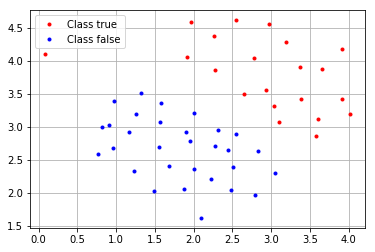

In [8]:
#Visualize the data
data = parse_file("ex6data1.mat")
plot_data(data['X'],data['y']) #Plot our training datapoints.

Our data appears to be linearly seperatable

In [5]:
#We use a linear kernel with the sklearn svm classification module.
model = svm.SVC(kernel='linear', C=1) #Using linear kernel
model.fit(data['X'], data['y']) #Fit the model using our training data.

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors 12


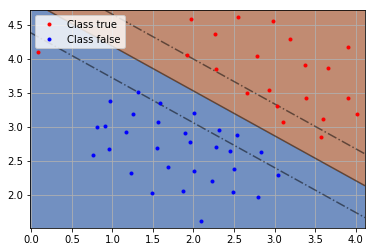

In [6]:
#Plot the boundary of the plane.
x0 = np.linspace(data['X'][:,0].min()-0.1,data['X'][:,0].max()+0.1, num = 200)
x1 = np.linspace(data['X'][:,1].min()-0.1,data['X'][:,1].max()+0.1, num = 200)
x0, x1 = np.meshgrid(x0, x1) #Create a meshgrid
X_test = np.c_[x0.ravel(), x1.ravel()] #Flattens x0 and x1 so we can predict on them
yHat = model.decision_function(X_test)
yHat = yHat.reshape(x0.shape)
plot_data(data['X'],data['y'])
#plt.contour(x0,x1,yHat,cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']))
plt.contour(x0, x1, yHat, colors='black', levels=[-1, 0, 1], alpha=0.5, linestyles=['-.', '-', '-.']) #Plot boundary
plt.contourf(x0, x1, yHat, cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']), levels=[-1000, 0 ,1000]) #Add color
plt.plot()
print('Number of support vectors', model.support_.size) #Print the numberof support vectors the model uses.

In [7]:
#Plot the confusion matrix
yHat = model.predict(data['X']) #Our prediction
conf_mat = confusion_matrix(data['y'],yHat) #Check our well our prediction fares with the actual values.
print(conf_mat)
class_report = classification_report(data['y'],yHat, target_names = ["0", "1"]) #Displays confusion grid.
print(class_report)

[[30  0]
 [ 1 20]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98        30
          1       1.00      0.95      0.98        21

avg / total       0.98      0.98      0.98        51



# SVM with gaussian kernels

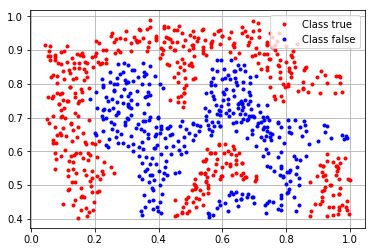

In [8]:
#Visualize the data
data = parse_file("ex6data2.mat")
plot_data(data['X'],data['y']) #Plot the data

The data isn't linearly seperatable so we use a gaussian kernel

In [9]:
#We use a gaussian kernel with the sklearn svm classification module.
model = svm.SVC(kernel='rbf', C=50, gamma =10) #We set C=50, C defines the penalty of misclassification. Gamma defines the impact of furthur points vs closer
model.fit(data['X'], data['y']) #Sklearn optimizes the hyperplane

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors 170


[]

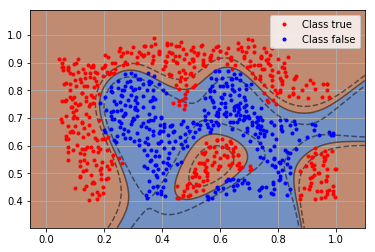

In [10]:
#Plot the boundary
x0 = np.linspace(data['X'][:,0].min()-0.1,data['X'][:,0].max()+0.1, num = 200)
x1 = np.linspace(data['X'][:,1].min()-0.1,data['X'][:,1].max()+0.1, num = 200)
x0, x1 = np.meshgrid(x0, x1) #Create a mes 
X_test = np.c_[x0.ravel(), x1.ravel()] #Flattens x0 and x1 so we can predict on them
yHat = model.decision_function(X_test)
yHat = yHat.reshape(x0.shape)
plot_data(data['X'],data['y'])
#plt.contourf(x0,x1,yHat,cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']))
plt.contour(x0, x1, yHat, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.contourf(x0, x1, yHat, cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']), levels=[-1000, 0 ,1000])
print('Number of support vectors', model.support_.size)
plt.plot()

In [11]:
#Plot the confusion matrix
yHat = model.predict(data['X'])
conf_mat = confusion_matrix(data['y'],yHat)
print(conf_mat)
class_report = classification_report(data['y'],yHat, target_names = ["0", "1"])
print(class_report)

[[375   8]
 [ 23 457]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       383
          1       0.98      0.95      0.97       480

avg / total       0.96      0.96      0.96       863



# SVM using split validation set

We optimize a new dataset for C and gamma with respect to the validation set.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

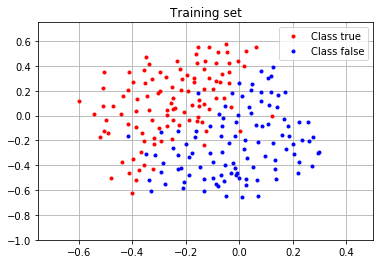

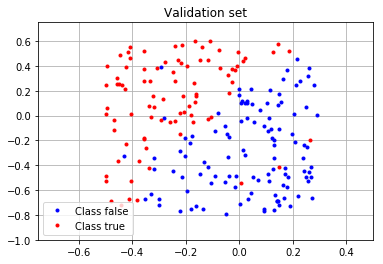

In [13]:
#Visualize the data
data = parse_file("ex6data3.mat")
plot_data(data['X'],data['y']) #Plot train set
plt.title("Training set")
plt.xlim([-0.75, 0.5]) #Change the limits so the data can be more visible
plt.ylim([-1, 0.75])
plt.show()
plot_data(data['Xval'],data['yval']) #Plot validation set
plt.title("Validation set")
plt.xlim([-0.75, 0.5])
plt.ylim([-1, 0.75])
plt.show()

In [14]:
#Grid search searches over a dict of various parameters.
#Find the most optimal parameters.
model = svm.SVC(kernel='rbf')
parameterDict = { #Dictionary of parameter space we will search through
    'gamma' : [0.1,1,5,10,20],
    'C' : [1, 10, 100, 1000]
}
#We search for parameters based on training data split into 5 folds. 
model = GridSearchCV(model, parameterDict, cv=5)
model.fit(data['X'],data['y']) #We then fit the model to the data
print("Parameters chosen after 5 folds:")
print(model.best_params_)
print("Score of the model on training")
print(model.best_score_)
print("Score of the model on test")
print(model.score(data['Xval'],data['yval']))

Parameters chosen after 5 folds:
{'C': 10, 'gamma': 5}
Score of the model on training
0.919431279621
Score of the model on test
0.95


[]

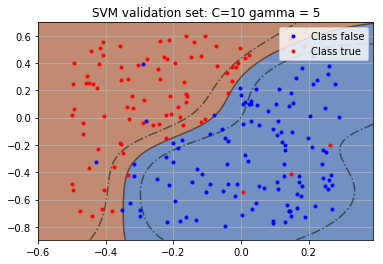

In [15]:
#Plot the boundary
x0 = np.linspace(data['Xval'][:,0].min()-0.1,data['Xval'][:,0].max()+0.1, num = 200)
x1 = np.linspace(data['Xval'][:,1].min()-0.1,data['Xval'][:,1].max()+0.1, num = 200)
x0, x1 = np.meshgrid(x0, x1) #Create a meshgrid
X_test = np.c_[x0.ravel(), x1.ravel()] #Flattens x0 and x1 so we can predict on them
yHat = model.decision_function(X_test)
yHat = yHat.reshape(x0.shape)
plot_data(data['Xval'],data['yval'])
plt.title("SVM validation set: C="+str(model.best_params_['C'])+" gamma = "+str(model.best_params_['gamma']))
plt.contour(x0, x1, yHat, colors='black', levels=[-1, 0, 1], alpha=0.5, linestyles=['-.', '-', '-.']) #Plot boundary
plt.contourf(x0, x1, yHat, cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']), levels=[-1000, 0 ,1000]) #Coloring
plt.plot()

In [16]:
#Plot the confusion matrix
yval_pred = model.predict(data['Xval']) #Our predicted class
conf_mat = confusion_matrix(data['yval'],yval_pred) #Determine the confusion matrix between predicted and actual
print(conf_mat)
class_report = classification_report(data['yval'], yval_pred, target_names = ["0", "1"])
print(class_report)

[[108   5]
 [  5  82]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       113
          1       0.94      0.94      0.94        87

avg / total       0.95      0.95      0.95       200



# Sklearn cancer prediction model

In [17]:
#Get the datasets from sklearn.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
#Returns a "sklearn bunch data object"
print(data.DESCR) #Describe the data

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [18]:
#Load the data into a dataframe.
#First add the labels.
cancer = pd.DataFrame({"class" : data.target})
#Then add the features.
for i in range (len(data.feature_names)):
    feature = pd.DataFrame({data.feature_names[i] : data.data[:,i]})
    cancer = pd.concat([cancer,feature], axis=1)
#Our dataframe contains the class and feature labels
cancer.head(5)

,class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[]

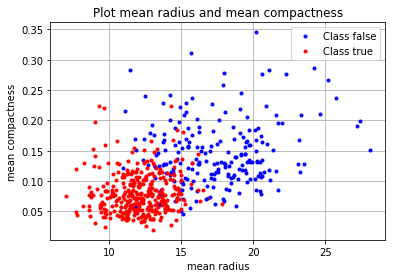

In [19]:
#Visualize the data on some parameters
#Of course we cannot visualize the 30 features of the data
#We plot 2 labels. Radius and compactness.
X = np.c_[cancer["mean radius"], cancer["mean compactness"]]
plot_data(X,cancer["class"])
plt.xlabel("mean radius")
plt.ylabel("mean compactness")
plt.title("Plot mean radius and mean compactness")
plt.plot()

In [20]:
#Split the data so we can test effectiveness of parameters
X, Xval, y, yval = train_test_split(cancer.values[:,1:], cancer.values[:,0], test_size = 0.2)

In [21]:
#Feature scaling using sklearn pipeline and mean/std dev scaling method
X_scale = preprocessing.scale(X)
Xval_scale = preprocessing.scale(Xval)

In [22]:
#We use the linear kernel
model = svm.SVC(random_state = None)
parameterDict = {
    'kernel' : ['linear'],
    'gamma' : [0.01, 0.1,1,5,10,20],
    'C' : [ 1, 10, 100, 1000]
}
#We search for parameters based on training data split into 5 folds
model = GridSearchCV(model, parameterDict, cv=5)
model.fit(X_scale,y)
print("Parameters chosen after 10 folds:")
print(model.best_params_)
print("Score of the model on training")
print(model.best_score_)
print("Score of the model on test")
print(model.score(Xval_scale,yval))

Parameters chosen after 10 folds:
{'kernel': 'linear', 'C': 1, 'gamma': 0.01}
Score of the model on training
0.971428571429
Score of the model on test
0.973684210526


In [23]:
#We use the gaussian kernel
model = svm.SVC(random_state = None)
parameterDict = {
    'kernel' : ['rbf'],
    'gamma' : [0.01, 0.1,1,5,10,20],
    'C' : [ 1, 10, 100, 1000]
}
#We search for parameters based on training data split into 5 folds
model = GridSearchCV(model, parameterDict, cv=5)
model.fit(X_scale,y)
print("Parameters chosen after 10 folds:")
print(model.best_params_)
print("Score of the model on training")
print(model.best_score_)
print("Score of the model on test")
print(model.score(Xval_scale,yval))

Parameters chosen after 10 folds:
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
Score of the model on training
0.978021978022
Score of the model on test
0.991228070175


Interestingly, the linear and gaussian kernels have a similar performance on this dataset.

In [24]:
#Plot the confusion matrix
yval_pred = model.predict(Xval_scale)
conf_mat = confusion_matrix(yval,yval_pred)
print(conf_mat)
class_report = classification_report(yval, yval_pred, target_names = ["No cancer", "Cancer"])
print(class_report)

[[41  1]
 [ 0 72]]
             precision    recall  f1-score   support

  No cancer       1.00      0.98      0.99        42
     Cancer       0.99      1.00      0.99        72

avg / total       0.99      0.99      0.99       114

